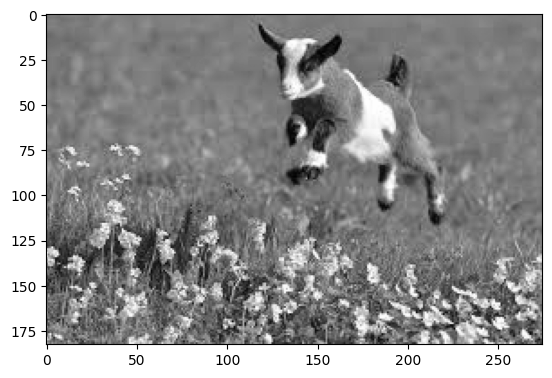

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Read in the image
image = io.imread('goat_jump.jpg')

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Generate a heightmap from the grayscale image
heightmap = np.array(gray_image * 255, dtype=np.uint8)

# Display the heightmap
plt.imshow(heightmap, cmap='gray')
plt.show()


In [3]:
from PIL import Image
from solid import *
from solid.utils import *

# Read in the heightmap
heightmap = Image.open('goat_jump.jpg').convert('L')
heightmap_data = np.array(heightmap)


# Define the function to generate the 3D model from the heightmap
x_size, y_size = heightmap.shape
x_spacing = 1.0 * scale / x_size
y_spacing = 1.0 * scale / y_size

def point(x, y, z):
    return translate([x * x_spacing, y * y_spacing, z * height])(sphere(0.01))

base = []
for x in range(x_size):
    row = []
    for y in range(y_size):
        row.append(point(x, y, heightmap[x, y] * height))
    base.append(row)

faces = []
for x in range(x_size - 1):
    for y in range(y_size - 1):
        a = base[x][y]
        b = base[x][y+1]
        c = base[x+1][y+1]
        d = base[x+1][y]
        faces.append(polyhedron(points=[a, b, c, d], faces=[[0,1,2],[0,2,3],[0,3,1],[1,2,3]]))

    # return union()(*faces)


# Generate the 3D model
# model = generate_model(heightmap_data, scale=10.0, height=5.0)

# Use the generated model to create an STL file
# model.save_as_scad('got.scad')
